In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix

In [3]:
#P1 part 1 Select Data distribution

#Generate 4 class MVG 
#a = np.matrix('1 2; 3 4')

mu = np.array([[3, 3, 3], 
               [-3, 3, 3], 
               [-3, -3, 3],
               [3, -3, 3]])
mu = mu.T
Sigma = np.zeros((3,3,4))
Sigma = np.array([[[3, .3, 2],
                   [.3, 3, 0],
                   [2, 0, 3]],
                  [[4, 0, 0],
                   [0, 4, -3],
                   [0, -3, 4]],
                  [[2, 0.5, 1],
                   [0.5, 2, 0],
                   [1, 0, 2]],
                  [[1, 0, 0.2],
                   [0, 1, 0.2],
                   [0.2, 0.2, 1]]])
q = np.array((0.3, 0.4, 0.2, 0.1))
q_z = np.array((0.3,0.4,0.2, 0.11))
thr =  np.cumsum(q_z)
thr = np.concatenate(([0], thr),axis = 0)
assert np.max(np.cumsum(q))>0.9999, "Priors don't equal 1"

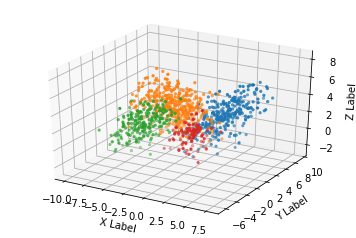

In [4]:
## Generate Samples of data and plot distribution
N = 1000 # number of samples
n = 3 # dimension
x1= np.zeros((N,3)); u1 = np.random.rand(1,N); L1  = np.zeros(N); 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
m = ('o','^','+','s')
for l in np.arange(0,4):
    indices1 = np.where((u1>=thr[l]) & (u1<thr[l+1]))
    L1[indices1[1]] = l
    x1[indices1[1],:] = np.random.multivariate_normal(mu[:,l],Sigma[l,:,:],np.size(L1[indices1[1]]))
    ax.scatter(x1[indices1[1],0], x1[indices1[1],1], x1[indices1[1],2],marker = '.')
assert np.sum([np.size(np.where(L1==0)), np.size(np.where(L1==1)),np.size(np.where(L1==2)),np.size(np.where(L1==3))])==N,"not all samples classified"
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

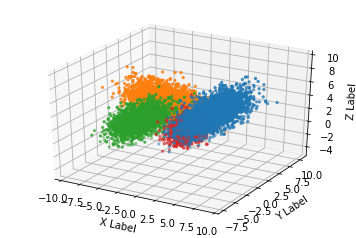

In [5]:
## Generate Samples of data and plot distribution
N = 10000 # number of samples
n = 3 # dimension
x= np.zeros((N,3))
u = np.random.rand(1,N); L  = np.zeros(N); 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
m = ('o','^','+','s')
for l in np.arange(0,4):
    indices = np.where((u>=thr[l]) & (u<thr[l+1]))
    L[indices[1]] = l
    x[indices[1],:] = np.random.multivariate_normal(mu[:,l],Sigma[l,:,:],np.size(L[indices[1]]))
    ax.scatter(x[indices[1],0], x[indices[1],1], x[indices[1],2],marker = '.')
assert np.sum([np.size(np.where(L==0)), np.size(np.where(L==1)),np.size(np.where(L==2)),np.size(np.where(L==3))])==N,"not all samples classified"
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


In [6]:
print('True Class Sizes')
print('Class 0: ' + str(np.where(L==0)[0].size) + ' prior = ' + str(q[0]))
print('class 1: ' + str(np.where(L==1)[0].size) + ' prior = ' + str(q[1]))
print('class 2: ' + str(np.where(L==2)[0].size) + ' prior = ' + str(q[2]))
print('class 3: ' + str(np.where(L==3)[0].size) + ' prior = ' + str(q[3]))

True Class Sizes
Class 0: 3145 prior = 0.3
class 1: 3971 prior = 0.4
class 2: 1887 prior = 0.2
class 3: 997 prior = 0.1


In [7]:
Decision  = np.zeros(N)
dist0 = multivariate_normal(mean=mu[:,0], cov=Sigma[0,:,:])
dist1 = multivariate_normal(mean=mu[:,1], cov=Sigma[1,:,:])
dist2 = multivariate_normal(mean=mu[:,2], cov=Sigma[2,:,:])
dist3 = multivariate_normal(mean=mu[:,3], cov=Sigma[3,:,:])
eval0 = dist0.pdf(x)*q[0]
eval1 = dist1.pdf(x)*q[1]
eval2 = dist2.pdf(x)*q[2]
eval3 = dist3.pdf(x)*q[3]
indices0 = np.where((eval0>eval1) & (eval0>eval2) & (eval0>eval3))
indices1 = np.where((eval1>eval0) & (eval1>eval2) & (eval1>eval3))
indices2 = np.where((eval2>eval0) & (eval2>eval1) & (eval2>eval3))
indices3 = np.where((eval3>eval0) & (eval3>eval1) & (eval3>eval2))
Decision[indices0[0]] = 0
Decision[indices1[0]] = 1
Decision[indices2[0]] = 2
Decision[indices3[0]] = 3
confusion_matrix(L, Decision, labels=[0, 1, 2, 3])

array([[2998,  119,    4,   24],
       [ 141, 3786,   43,    1],
       [   5,   49, 1827,    6],
       [  20,    1,    6,  970]])

In [8]:
# Do something fancy here to plot it all
theoretical =(10000-np.trace(confusion_matrix(L, Decision, labels=[0, 1, 2, 3])))/10000.0
print("theoretical maximum probability correct" + str(1-theoretical))
#ind00
#ind11
#ind22
#ind33
10000-np.trace(confusion_matrix(L, Decision, labels=[0, 1, 2, 3]))

theoretical maximum probability correct0.9581


419

In [9]:
## Generate Samples of NN training data and plot distribution
N = 100
x_test100 = np.zeros((N,3))
u_test100 = np.random.rand(1,N); Ltest_100  = np.zeros(N);
for l in np.arange(0,4):
    indicestest_100 = np.where((u_test100>=thr[l]) & (u_test100<thr[l+1]))
    Ltest_100[indicestest_100[1]] = l
    x_test100[indicestest_100[1],:] = np.random.multivariate_normal(mu[:,l],Sigma[l,:,:],np.size(Ltest_100[indicestest_100[1]]))
assert np.sum([np.size(np.where(Ltest_100==0)), np.size(np.where(Ltest_100==1)),np.size(np.where(Ltest_100==2)),np.size(np.where(Ltest_100==3))])==N,"not all samples classified"

N = 1000
x_test1000 = np.zeros((N,3))
u_test1000 = np.random.rand(1,N); Ltest_1000  = np.zeros(N);
for l in np.arange(0,4):
    indicestest_1000 = np.where((u_test1000>=thr[l]) & (u_test1000<thr[l+1]))
    Ltest_1000[indicestest_1000[1]] = l
    x_test1000[indicestest_1000[1],:] = np.random.multivariate_normal(mu[:,l],Sigma[l,:,:],np.size(Ltest_1000[indicestest_1000[1]]))
assert np.sum([np.size(np.where(Ltest_1000==0)), np.size(np.where(Ltest_1000==1)),np.size(np.where(Ltest_1000==2)),np.size(np.where(Ltest_1000==3))])==N,"not all samples classified"

N = 10000
x_test10000 = np.zeros((N,3))
u_test10000 = np.random.rand(1,N); Ltest_10000  = np.zeros(N);
for l in np.arange(0,4):
    indicestest_10000 = np.where((u_test10000>=thr[l]) & (u_test10000<thr[l+1]))
    Ltest_10000[indicestest_10000[1]] = l
    x_test10000[indicestest_10000[1],:] = np.random.multivariate_normal(mu[:,l],Sigma[l,:,:],np.size(Ltest_10000[indicestest_10000[1]]))
assert np.sum([np.size(np.where(Ltest_10000==0)), np.size(np.where(Ltest_10000==1)),np.size(np.where(Ltest_10000==2)),np.size(np.where(Ltest_10000==3))])==N,"not all samples classified"

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.model_selection import KFold

Using TensorFlow backend.


In [ ]:
#100 sample size training
accuracy = np.zeros((10,10))
x_data = x_test100
y_data = keras.utils.to_categorical(Ltest_100, num_classes=4) #keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
#x_test = np.random.random((100, 20))
#y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
kf = KFold(n_splits=10)
j = 0
for train_index, test_index in kf.split(x_data):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x_data[train_index], x_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    for i in range(1,11):
        model = Sequential()
        # Dense(64) is a fully-connected layer with 64 hidden units.
        # in the first layer, you must specify the expected input data shape:
        # here, 3-dimensional vectors.
        model.add(Dense(i, activation='sigmoid', input_dim=3))
        model.add(Dense(4, activation='softmax'))
        sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        model.compile(loss='categorical_crossentropy',
                    optimizer=sgd,
                    metrics=['accuracy'])
        converged = 0
        tmp = 0
        epsilon = 0.001
        while not converged:
            model.fit(x_train, y_train, batch_size=None, epochs=50)
            score = model.evaluate(x_test, y_test)
            converged = np.abs(score[1]-tmp)<epsilon
            tmp = score[1]
        accuracy[j,i-1] = score[1]
    j+=1

In [12]:
score[1]

0.8999999761581421

In [13]:
model_means = np.mean(accuracy,axis=1)
model_order = np.where(model_means == np.max(model_means))[0][0] + 1
model_order

2

<function matplotlib.pyplot.show>

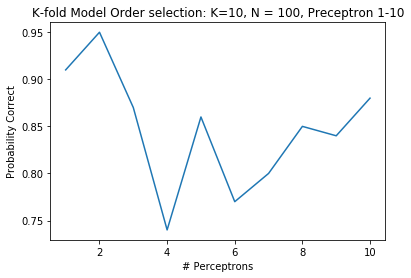

In [14]:
plt.plot(np.arange(1,11), model_means)
plt.title('K-fold Model Order selection: K=10, N = 100, Preceptron 1-10')
plt.xlabel('# Perceptrons')
plt.ylabel('Probability Correct')
plt.show

In [ ]:
y_testfinal = keras.utils.to_categorical(L, num_classes = 4)
model = Sequential()
# Dense(n) is a fully-connected layer with n hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 3-dimensional vectors.
model.add(Dense(model_order, activation='sigmoid', input_dim=3))
model.add(Dense(4, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
            optimizer=sgd,
            metrics=['accuracy'])
converged = 0
tmp = 0
epsilon = 0.001
while not converged:
    model.fit(x_data, y_data, batch_size=None, epochs=50)
    score = model.evaluate(x, y_testfinal)
    converged = np.abs(score[1]-tmp)<epsilon
    tmp = score[1]
print("Accuracy on Test Data (1 being 100%): " + str(score[1]))

In [16]:
score[1]

0.932699978351593

In [17]:
NN_predict = model.predict(x)
decision = np.argmax(NN_predict,axis=1)
confusion_matrix(L, decision, labels=[0, 1, 2, 3])

array([[2751,  262,    9,  123],
       [ 106, 3808,   56,    1],
       [   1,   96, 1778,   12],
       [   2,    1,    4,  990]])

In [ ]:
#1,000 sample size training
accuracy = np.zeros((10,10))
x_data = x_test1000
y_data = keras.utils.to_categorical(Ltest_1000, num_classes=4) #keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
#x_test = np.random.random((100, 20))
#y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
kf = KFold(n_splits=10)
j = 0
for train_index, test_index in kf.split(x_data):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x_data[train_index], x_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    for i in range(1,11):
        model = Sequential()
        # Dense(64) is a fully-connected layer with 64 hidden units.
        # in the first layer, you must specify the expected input data shape:
        # here, 3-dimensional vectors.
        model.add(Dense(i, activation='sigmoid', input_dim=3))
        model.add(Dense(4, activation='softmax'))
        sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        model.compile(loss='categorical_crossentropy',
                    optimizer=sgd,
                    metrics=['accuracy'])
        converged = 0
        tmp = 0
        epsilon = 0.001
        while not converged:
            model.fit(x_train, y_train, batch_size=None, epochs=50)
            score = model.evaluate(x_test, y_test)
            converged = np.abs(score[1]-tmp)<epsilon
            tmp = score[1]
        accuracy[j,i-1] = score[1]
    j+=1

In [19]:
model_means = np.mean(accuracy,axis=1)
model_order = np.where(model_means == np.max(model_means))[0][0] + 1
model_order

5

<function matplotlib.pyplot.show>

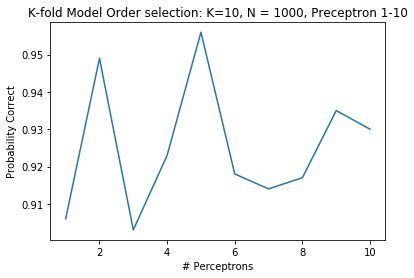

In [20]:
plt.plot(np.arange(1,11), model_means)
plt.title('K-fold Model Order selection: K=10, N = 1000, Preceptron 1-10')
plt.xlabel('# Perceptrons')
plt.ylabel('Probability Correct')
plt.show

In [ ]:
y_testfinal = keras.utils.to_categorical(L, num_classes = 4)
model = Sequential()
# Dense(n) is a fully-connected layer with n hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 3-dimensional vectors.
model.add(Dense(model_order, activation='sigmoid', input_dim=3))
model.add(Dense(4, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
            optimizer=sgd,
            metrics=['accuracy'])
converged = 0
tmp = 0
epsilon = 0.001
while not converged:
    model.fit(x_data, y_data, batch_size=None, epochs=50)
    score = model.evaluate(x, y_testfinal)
    converged = np.abs(score[1]-tmp)<epsilon
    tmp = score[1]
print("Accuracy on Test Data (1 being 100%): " + str(score[1]))

In [22]:
score[1]

0.9415000081062317

In [23]:
NN_predict = model.predict(x)
decision = np.argmax(NN_predict,axis=1)
confusion_matrix(L, decision, labels=[0, 1, 2, 3])

array([[2865,  235,    3,   42],
       [ 108, 3794,   68,    1],
       [   1,   82, 1788,   16],
       [  24,    1,    4,  968]])

In [ ]:
#10,000 sample size training
accuracy = np.zeros((10,10))
x_data = x_test10000
y_data = keras.utils.to_categorical(Ltest_10000, num_classes=4) #keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
#x_test = np.random.random((100, 20))
#y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
kf = KFold(n_splits=10)
j = 0
for train_index, test_index in kf.split(x_data):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x_data[train_index], x_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    for i in range(1,11):
        model = Sequential()
        # Dense(64) is a fully-connected layer with 64 hidden units.
        # in the first layer, you must specify the expected input data shape:
        # here, 3-dimensional vectors.
        model.add(Dense(i, activation='sigmoid', input_dim=3))
        model.add(Dense(4, activation='softmax'))
        sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        model.compile(loss='categorical_crossentropy',
                    optimizer=sgd,
                    metrics=['accuracy'])
        converged = 0
        tmp = 0
        epsilon = 0.001
        while not converged:
            model.fit(x_train, y_train, batch_size=None, epochs=50)
            score = model.evaluate(x_test, y_test)
            converged = np.abs(score[1]-tmp)<epsilon
            tmp = score[1]
        accuracy[j,i-1] = score[1]
    j+=1

In [25]:
model_means = np.mean(accuracy,axis=1)
model_order = np.where(model_means == np.max(model_means))[0][0] + 1
model_order

9

<function matplotlib.pyplot.show>

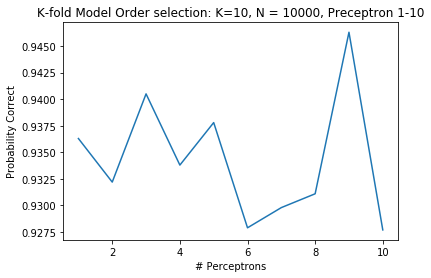

In [28]:
plt.plot(np.arange(1,11), model_means)
plt.title('K-fold Model Order selection: K=10, N = 10000, Preceptron 1-10')
plt.xlabel('# Perceptrons')
plt.ylabel('Probability Correct')
plt.show

In [ ]:
y_testfinal = keras.utils.to_categorical(L, num_classes = 4)
model = Sequential()
# Dense(n) is a fully-connected layer with n hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 3-dimensional vectors.
model.add(Dense(model_order, activation='sigmoid', input_dim=3))
model.add(Dense(4, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
            optimizer=sgd,
            metrics=['accuracy'])
converged = 0
tmp = 0
epsilon = 0.001
while not converged:
    model.fit(x_data, y_data, batch_size=None, epochs=50)
    score = model.evaluate(x, y_testfinal)
    converged = np.abs(score[1]-tmp)<epsilon
    tmp = score[1]
print("Accuracy on Test Data (1 being 100%): " + str(score[1]))

In [29]:
score[1]

0.9545000195503235

In [30]:
NN_predict = model.predict(x)
decision = np.argmax(NN_predict,axis=1)
confusion_matrix(L, decision, labels=[0, 1, 2, 3])

array([[2971,  144,    6,   24],
       [ 134, 3796,   40,    1],
       [   2,   59, 1819,    7],
       [  29,    4,    5,  959]])

In [31]:
np.trace(confusion_matrix(L, decision, labels=[0, 1, 2, 3]))

9545

In [32]:
10000-9545

455